# Probabilistic inference with pomegranate


<div style="width: 600px; margin: auto;"> 

![](figures/Pomegranate.jpg)

</div>

## Probabilistic positioning

Find the position of the target (star) when you have uncertain distance measurements, $r_i$,  from known basestations (1..3). 

<div style="margin: auto">
    
![](figures/positioning.svg)

</div>

The optimal solution is the location, $x$,  which maximises the probability 

$$x \underset{\mathrm{argmax}}{=}\prod_{i=1}^N p(x | r_i)$$

The probabilistic terms (factors) can be described graphically as factor graph. Every constraint $\psi(\mathbf{x}_i)$ is a function returning the probability of the current position $\mathbf{x}_i$. The optimisation algorithms finds the location which maximises the probability of the product of all constraints at the same time.

<div style="width:800px; margin: auto;">
    
![](figures/fg.svg)

</div>

$$x_i \underset{\mathrm{argmax}}{=}\prod_{j=1}^N p(\mathbf{x}_i | \psi_j(\mathbf{x}_i)$$

## What  is probabilistic inference

A probabilistic model PM represents a unique probability distribution $P$ over a set of random
variables. 

Bayesian networks and Markov models are probabilistic graphical models (PGM) where the mutual (in)dependencies of variables or events can be modeled instead of assuming that they are all dependent.

Given such a representation, the following are some of the important tasks we can accomplish.

1. Querying: Computing the likelihood of certain variables, optionally conditioned on another set of
variables. This is generally called Probabilistic Inference.
2. Estimation: When the model itself is unknown, estimating a plausible model $M$ from data $D$. This
process is called Learning

## Making some probabilistic distributions

We'll assume that students which prepare well to the exam will have typically better grade than those whose are not that well prepared. This rule has of course exceptions and and imprecision in it, so it cannot be modeled with hard logics, but probabilistic models are well suited.

In the following it is assumed that based on the previous experience and interviews, it is known that the grades of well distributed students are distributed around 4, with standard deviation 1, and the grades of not that well prepared students are around 2. The amount of students examined is large, and we can therefore assume normal distribution. In this case the probability of different grades can be estimated using two different normal distributions.

These distributions can be combined to get the distribution of all students.

In [1]:
import numpy as np
from numpy import mean , linspace
import matplotlib.pyplot as plt
import pomegranate as pg 
from scipy.stats import gaussian_kde  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
well_prepared=pg.NormalDistribution(4,1)
badly_prepared=pg.NormalDistribution(2,1)   

# Combined, all students
all_students = pg.GeneralMixtureModel([well_prepared, badly_prepared])

Let's now visualize the distributions to understand them better.

In [3]:
linspace(0,5)

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

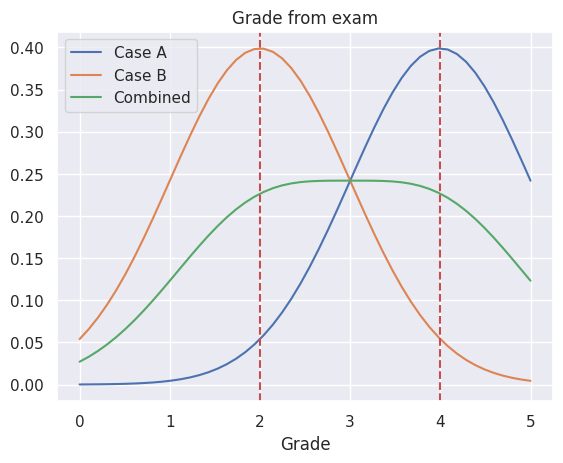

In [4]:
i=linspace(0,5)
plt.plot(i,well_prepared.probability(i), label='Case A')
plt.plot(i,badly_prepared.probability(i), label='Case B')
plt.plot(i,all_students.probability(i), label='Combined')
plt.xlabel('Grade')
plt.title('Grade from exam')
plt.legend()
plt.axvline(x=2, linestyle='--', color='r')
plt.axvline(x=4, linestyle='--', color='r')


### Using the model

The model created above can now be used for asking questions from it. For example such as:

1. What grade you will get, if you are well prepared or badly prepared, according to the current model? This is still easy, because when the normal distributions were created, the average value for well prepared was set to 4, and badly prepared as 2. These are also the most probable grade a student belonging to each class will get.
1. What is the probability of well prepared of getting grade 4, $P(4 | W)$? 
1. What is the probability of badly prepared of getting grade 4, $P(4 | B)$? 
1. What is the probability of getting grade 4 in general, $P(4)$?
1. If student got grade 4, what is the probability that he/she was well prepared $P(W | 4)$?
1. If student got grade 4, what is the probability that he/she was badly prepared $P(B | 4)$?

Let's use assumption that half of the students were well prepared and half were those with weaker preparations: $P(W) = P(B) = 0.5$.

The answer to the question 5-6 is given by Bayes Rule 

$$    P(W|4) = \frac{P(4|W)P(W)}{P(4)} $$

In [5]:
print("Check the question 1 by resampling the distribution")
print("  Mean grade for well prepared student is   %3.1f" % (mean(well_prepared.sample(100))))
print("  Mean grade for weakly prepared student is %3.1f" % (mean(badly_prepared.sample(100)))) 
print("")

print("Questions 2-4")
print("  Probability of well prepared of getting grade 4  P(4|W) = %d %%" % (well_prepared.probability(4)*100))
print("  Probability of badly prepared of getting grade 4 P(4|B) = %d %%" % (badly_prepared.probability(4)*100))
print("  Probability for all getting grade 4                P(4) = %d %%" % (all_students.probability([4])[0]*100))

print("")
pw=well_prepared.probability(4)*0.5/all_students.probability([4])[0]
print("  Probability that a student getting grade 4 is well prepared P(W|4) = %d %%" % (pw*100))

pb=badly_prepared.probability(4)*0.5/all_students.probability([4])[0]
print("  Probability that a student getting grade 4 is badly prepared P(B|4) = %d %%" % (pb*100))


Check the question 1 by resampling the distribution
  Mean grade for well prepared student is   4.0
  Mean grade for weakly prepared student is 2.0

Questions 2-4
  Probability of well prepared of getting grade 4  P(4|W) = 39 %
  Probability of badly prepared of getting grade 4 P(4|B) = 5 %
  Probability for all getting grade 4                P(4) = 22 %

  Probability that a student getting grade 4 is well prepared P(W|4) = 88 %
  Probability that a student getting grade 4 is badly prepared P(B|4) = 11 %


# Probabilistic classifier 

Can the students be classified to well prepared and badly prepared classes based on their grade?

Perhaps, but there are certainly students who perform well even though they have not prepared so well and vice versa. A probabilistic classifier can nicely capture these uncertainties. 

Bayesian classfier estimates the probabilities of a data vector $\bf{x}$ belonging in class $C_k$. It uses the Bayes theorem for making the prediction using the opposite condition probability, what is the probability that data  $\bf{x}$ was observed, when class $C_k$ is known?

$$    P(C_k|\mathbf{x}) = \frac{P(\mathbf{x}|C_k)P(C_k)}{P(\mathbf{x})} $$


The class $C_k$ is selected, whose probability is the highest. The actual probabilities can be used for estimating the reliability of the classifier. 

For example, when we calculated that $P(W|4) = 88\% > P(B|4) = 11 \%$, we can conclude that the student having grade 4 is probably well prepared.

These calculations are made by a Bayesian classifier, which can be created and used as follows:

In [6]:
print("Check the question 1 by resampling the distribution")
print("  Mean grade for well prepared student is   %3.1f" % (mean(well_prepared.sample(100))))
print("  Mean grade for weakly prepared student is %3.1f" % (mean(badly_prepared.sample(100))))
print("")

print("Questions 2-4")
print("  Probability of well prepared of getting grade 4  P(4|W) = %d %%" % (well_prepared.probability(4)*100))
print("  Probability of badly prepared of getting grade 4 P(4|B) = %d %%" % (badly_prepared.probability(4)*100))
print("  Probability for all getting grade 4                P(4) = %d %%" % (all_students.probability([4])[0]*100))

print("")
pw=well_prepared.probability(4)*0.5/all_students.probability([4])[0]
print("  Probability that a student getting grade 4 is well prepared P(W|4) = %d %%" % (pw*100))

pb=badly_prepared.probability(4)*0.5/all_students.probability([4])[0]
print("  Probability that a student getting grade 4 is badly prepared P(B|4) = %d %%" % (pb*100))


Check the question 1 by resampling the distribution
  Mean grade for well prepared student is   4.1
  Mean grade for weakly prepared student is 2.0

Questions 2-4
  Probability of well prepared of getting grade 4  P(4|W) = 39 %
  Probability of badly prepared of getting grade 4 P(4|B) = 5 %
  Probability for all getting grade 4                P(4) = 22 %

  Probability that a student getting grade 4 is well prepared P(W|4) = 88 %
  Probability that a student getting grade 4 is badly prepared P(B|4) = 11 %


In [8]:
# Create Naive Bayes classifier by describing two different classes 
# with normal distributions as priors
model = pg.NaiveBayes([badly_prepared, well_prepared])


# Predict the posterior probability of class memberships when 
# Grade=4 is observed
prob=model.predict_proba([4])

# Predict the most probable class if one gets grade 4
c=model.predict([4])

In [9]:
print(prob)
print(c)

[[0.11920292 0.88079708]]
[1]


The probabilities of classes badly prepared, well prepared are  [[0.11920292 0.88079708]]
The most probable class is  [1]


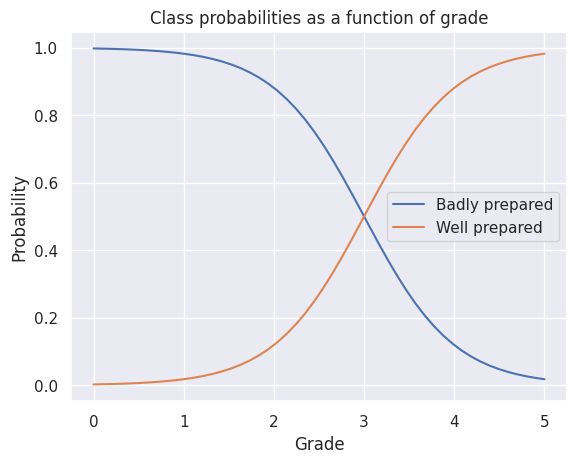

In [10]:
print("The probabilities of classes badly prepared, well prepared are ", prob )
print("The most probable class is ", c)

# Lets still plot the probabilities of class memberships over all grades
grades=np.reshape(linspace(0,5,50), newshape=(50,1))
proball=model.predict_proba(grades)
lines=plt.plot(grades, proball)
plt.xlabel('Grade')
plt.ylabel('Probability')
plt.title('Class probabilities as a function of grade')
plt.legend(['Badly prepared', 'Well prepared'])

Here the classification rule will be the following:

$$ C=\begin{cases}
    W & \text{if } P(W|g) > P(B|g) \\
    B,              & \text{otherwise}
\end{cases},$$

where $C$ is the most probable class, $W$ is the class of well prepared students and $B$ is the class of badly prepared students, $g$, is the grade.

### Multidimensional Bayesian classifier

Bayesian classifier can also easily work in multi-dimensional space.

Multidimensionality means that we have more than one observation and probabilistic dependency between observations and hidden state. More than one observation makes it easier to predict what the hidden state was.

If the two observations are mutually independent, they can be predicted without considering cross variance, using Naive Bayesian Classifier (NBC).

If the observations are mutually dependent, then Full Bayesian Classifier (FBC) is better, but NBC can still work quite well in many situations.

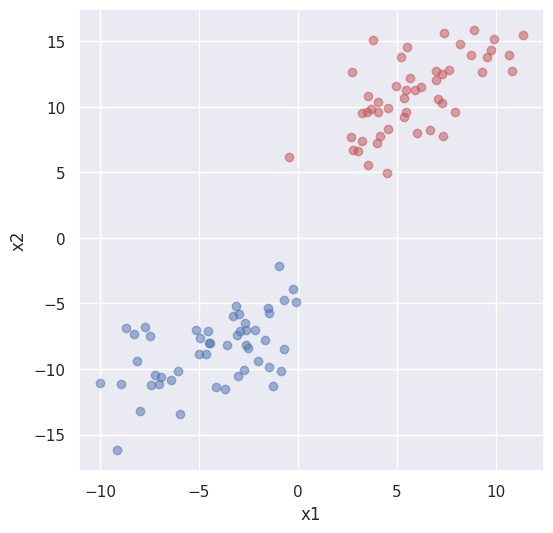

In [11]:
from sklearn.datasets import make_blobs, make_classification
import sklearn.datasets
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=2.5)
X[:,1] = X[:,1] + X[:,0]*0.6

plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b', alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Here the classification rule will be the following:

$$ C=\begin{cases}
    W & \text{if } P(W|x) > P(B|x) \\
    B,              & \text{otherwise}
\end{cases},$$

where $C$ is the most probable class, $W$ is the class of well prepared students and $B$ is the class of badly prepared students, $x=(x_1, x_2)$, is the observations .

With pomegranate, the decision boundaries can be easily calculated and visualized.

1. The NBC classifier is trained to separete red and blue items
1. Similarly, a full BC is trained to do the same
1. Then a data grid is made to cover the whole area
1. The decision boundary is the controur in this dense grid showing how would the items in the plane be classified

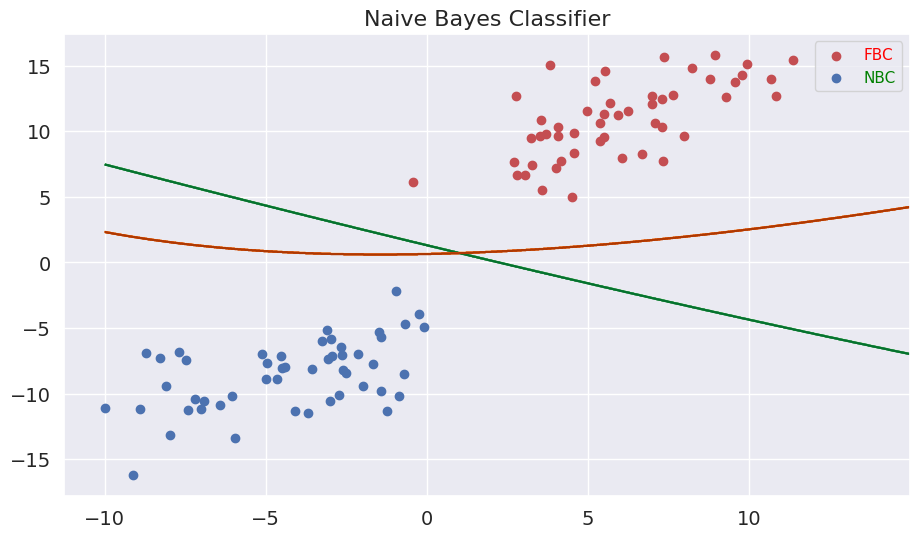

In [12]:
NBCmodel = pg.NaiveBayes.from_samples(pg.NormalDistribution, X, y)
BCmodel = pg.BayesClassifier.from_samples(pg.MultivariateGaussianDistribution, X, y)

xx, yy = np.meshgrid(np.arange(-10, 15, 0.02), np.arange(-15, 15, 0.02))
Z1 = NBCmodel.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z2 = BCmodel.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(24, 6)); plt.subplot(121); plt.title("Naive Bayes Classifier", fontsize=16)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b')
plt.contour(xx, yy, Z1, cmap='Greens')
plt.contour(xx, yy, Z2, cmap='Oranges')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);
plt.legend(['FBC', 'NBC'], labelcolor=['red', 'green'])
 

### Summary on Naive Bayesian classifiers

- The classifier is implemented by using random distributions and Bayes's rule
- The distributions can be also directly learned from data. Many frameworks which implement Naive Bayes have build in method for learning the data. See for example [NaiveBayes from Pomegranade](https://pomegranate.readthedocs.io/en/latest/NaiveBayes.html#initialization) or [NaiveBayes from ScikitLearn](https://scikit-learn.org/stable/modules/naive_bayes.html)
- Bayes classifier can also use other distributions than Normal, and more than one variable. For example, the estimation of student's prepareredness could be estimated from more than one observation, for example from the grade and work situation. 
- Naive Bayes is Naive in that sense that in multivariate case it assumes all marginal distributions being independent. Quite often it provides good estimates even being sligthly Naive. In one dimensional case the there is no difference with Naive bayesian or full Bayesian classifier.
- In multidimensional case, full Bayesian classifier can handle also diagonal distributions.


Read more about Bayesian Classifier from Pomegranade from [Naive Bayes and Bayes Classifiers](https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_5_Bayes_Classifiers.ipynb)

## Example case: Titanic survival data

![Painting of Titanic sinking](figures/Stower_Titanic.jpg)

> Painting of Titanic sinking by Willy Stöwer.

Let's study next the data describing the survivals from the Titanic accdent in 1912. The data set contains the following fields:

    PasengerId: integer
    pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
    Survived: 0 = No, 1 = Yes
    sibsp: # of siblings / spouses aboard the Titanic
    parch: # of parents / children aboard the Titanic
    ticket: Ticket number
    cabin: Cabin number
    embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

And some others

The question is, which observations would predict the survivability.

In [13]:
import pandas as pd

#train = pd.read_csv("data/titanic_train.csv").sample(400)
train = pd.read_csv("data/titanic_train.csv")
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Naive Bayes trial

In [14]:
#model = pg.NaiveBayes.from_samples(pg.NormalDistribution, X, y)
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import accuracy_score

#X=train.iloc[:,[2,4,5,6,7,9,10,11]]
X=train.iloc[:,[2,5,6,7,9]].copy()
X['Sex'] = (train.Sex=='female').astype('int')
y=train.iloc[:,1]
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,1
4,3,35.0,0,0,8.0500,0


In [16]:
model=CategoricalNB()
#model=GaussianNB() 
model.fit(X.ffill(),y)

CategoricalNB()

In [17]:
model.predict_proba(X.ffill())

array([[0.93838479, 0.06161521],
       [0.0296507 , 0.9703493 ],
       [0.77164528, 0.22835472],
       ...,
       [0.09142626, 0.90857374],
       [0.57017225, 0.42982775],
       [0.95361137, 0.04638863]])

In [19]:
accuracy_score(y_true=y, y_pred=model.predict(X.ffill()))

0.8226711560044894

## Bayesian networks

Bayesian network is a graphical model (a graph) of dependencies of probabilistic variables. The network can be used for estimating the joint probability function:

$$
  P(x_1, x_2, ..., x_n) = \Pi_{i=1}^{N}P(x_i | \mathrm{parents}(x_i))
$$

The parents of $x_i$ is those variables from which $x_i$ is dependent on (the ancestors in the graph). The direct ancestors are not needed for this calculation.

When the state of the variables $x_i$ are changed, the probabilities propagate in the network and change the posterior joint probability $P()$. 

In [24]:
#Xf=X.fillna(method='pad')
Xf=X.copy()
Xf['Age'] = round(train.ffill().Age/20).astype('int')
Xf['Fare'] = round(train.ffill().Fare/50).astype('int')
Xf.head()
#Xf.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex
0,3,1,1,0,0,0
1,1,2,1,0,1,1
2,3,1,0,0,0,1
3,1,2,1,0,1,1
4,3,2,0,0,0,0


((4,), (0,), (3,), (5,), (5,), (), (0, 5))


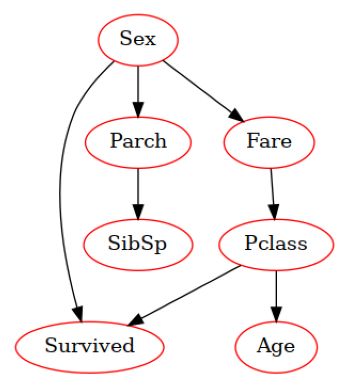

In [33]:
from pomegranate import BayesianNetwork

Data=Xf.copy()
Data['Survived']=y
model = BayesianNetwork.from_samples(Data, algorithm='exact', state_names=Data.columns)
print(model.structure)
model.plot()
plt.savefig('figures/bayesnet.png')

### Using the model

In [30]:
# The model can be used for filling in missing values, such as survivability
inputData=Data.copy()

# Remove all info about survivability
inputData.Survived=None

print(inputData.head())
predictedData=model.predict(inputData.values)

   Pclass  Age  SibSp  Parch  Fare  Sex Survived
0       3    1      1      0     0    0     None
1       1    2      1      0     1    1     None
2       3    1      0      0     0    1     None
3       1    2      1      0     1    1     None
4       3    2      0      0     0    0     None


In [31]:
y_predicted=np.array(predictedData)[:,-1].astype('int')
accuracy_score(y_true=Data.Survived.values, y_pred=y_predicted)
#y_predicted
#Data.Survived.values*1

0.7867564534231201

### The model parameters consist of probability tables

In [32]:
model.marginal()

array([{
           "class" : "Distribution",
           "dtype" : "numpy.int64",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "1" : 0.24242424242424337,
                   "2" : 0.20650953984287326,
                   "3" : 0.5510662177328833
               }
           ],
           "frozen" : false
       }                                     ,
       {
           "class" : "Distribution",
           "dtype" : "numpy.int64",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "0" : 0.09539842873176214,
                   "1" : 0.4399551066217726,
                   "2" : 0.37822671156004484,
                   "3" : 0.0785634118967455,
                   "4" : 0.007856341189674744
               }
           ],
           "frozen" : false
       }                                     ,
       {
           "class" : "Distribution",
           "dtype" : "numpy.int64",




[Bayesian Network Structure Learning](https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_4b_Bayesian_Network_Structure_Learning.ipynb)